# data load and storing

In [ ]:
import os
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from google.colab import files
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

In [ ]:
!pip install -q Kaggle
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! mkdir ~/.kaggle
! cp /content/gdrive/MyDrive/KaggleDatasetsAPI/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d rafyardhani/melanomalitev2

 84% 8.00M/9.58M [00:01<00:00, 12.4MB/s]
100% 9.58M/9.58M [00:01<00:00, 8.64MB/s]


In [ ]:
! unzip melanomalitev2.zip

Archive:  melanomalitev2.zip
  inflating: melanomalite/test/benign/melanoma_4000.jpg  
  inflating: melanomalite/test/benign/melanoma_4001.jpg  
  inflating: melanomalite/test/benign/melanoma_4002.jpg  
  inflating: melanomalite/test/benign/melanoma_4003.jpg  
  inflating: melanomalite/test/benign/melanoma_4004.jpg  
  inflating: melanomalite/test/benign/melanoma_4005.jpg  
  inflating: melanomalite/test/benign/melanoma_4006.jpg  
  inflating: melanomalite/test/benign/melanoma_4007.jpg  
  inflating: melanomalite/test/benign/melanoma_4008.jpg  
  inflating: melanomalite/test/benign/melanoma_4009.jpg  
  inflating: melanomalite/test/benign/melanoma_4010.jpg  
  inflating: melanomalite/test/benign/melanoma_4011.jpg  
  inflating: melanomalite/test/benign/melanoma_4012.jpg  
  inflating: melanomalite/test/benign/melanoma_4013.jpg  
  inflating: melanomalite/test/benign/melanoma_4014.jpg  
  inflating: melanomalite/test/benign/melanoma_4015.jpg  
  inflating: melanomalite/test/benign/melan

In [ ]:
TRAINING_DIR = "/content/melanomalite/train/"
TESTING_DIR = "/content/melanomalite/test"

TRAINING_MALIGNANT_DIR = "/content/melanomalite/train/malignant"
TRAINING_BENIGN_DIR = "/content/melanomalite/train/benign"

TESTING_MALIGNANT_DIR = "/content/melanomalite/test/malignant"
TESTING_BENIGN_DIR = "/content/melanomalite/test/benign"

print(f"\n\nThere are {len(os.listdir(TRAINING_MALIGNANT_DIR))} images of malignant for training")
print(f"There are {len(os.listdir(TRAINING_BENIGN_DIR))} images of benign for training")
print(f"There are {len(os.listdir(TESTING_MALIGNANT_DIR))} images of malignant for testing")
print(f"There are {len(os.listdir(TESTING_BENIGN_DIR))} images of benign for testing")



There are 400 images of malignant for training
There are 400 images of benign for training
There are 100 images of malignant for testing
There are 100 images of benign for testing


In [ ]:
# from torchvision.datasets import ImageFolder
# import torchvision.transforms as transforms
# # Function to show image
# train = ImageFolder(TRAINING_DIR, transform=transforms.ToTensor())
# def show_image(image, label):
#     print("Label :" + train.classes[label] + "(" + str(label) + ")")
#     return image.permute(1, 2, 0)

In [ ]:
# fig, axs = plt.subplots(2, 3,figsize=(12,10))
# fig.tight_layout(pad=0)
# axs[0,0].imshow(show_image(*train[1]))
# axs[0,1].imshow(show_image(*train[260]))
# axs[1, 0].imshow(show_image(*train[850]))
# axs[1,1].imshow(show_image(*train[930]))
# axs[0,2].imshow(show_image(*train[1250]))
# axs[1,2].imshow(show_image(*train[1380]))

In [ ]:
# fig, axs = plt.subplots(2, 3,figsize=(12,10))
# fig.tight_layout(pad=0)
# axs[0,0].imshow(show_image(*train[6000]))
# axs[0,1].imshow(show_image(*train[7000]))
# axs[1, 0].imshow(show_image(*train[6500]))
# axs[1,1].imshow(show_image(*train[7500]))
# axs[0,2].imshow(show_image(*train[7600]))
# axs[1,2].imshow(show_image(*train[7700]))

# Create Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax')
  ])

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=1e-4),
                metrics=['accuracy'])

  return model

# Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    horizontal_flip=True,
    vertical_flip=True
    # rescale=1./255,
    # rotation_range=40,
    # width_shift_range=0.3,
    # height_shift_range=0.3,
    # shear_range=0.3,
    # zoom_range=0.5,
    # horizontal_flip=True,
    # fill_mode='nearest'
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(224, 224),
        batch_size=64,
        color_mode='rgb',
        class_mode='categorical',
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        TESTING_DIR,
        target_size=(150, 150),
        batch_size=64,
        color_mode='rgb',
        class_mode='categorical',
        shuffle=False)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
test_generator.class_indices

{'benign': 0, 'malignant': 1}

In [ ]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)

Image batch shape:  (64, 224, 224, 3)
Label batch shape:  (64, 2)


In [ ]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Benign' 'Malignant']


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-01-04 02:22:16--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  25.8MB/s    in 4.0s    

2023-01-04 02:22:20 (21.0 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  ### START CODE HERE
  pre_trained_model = InceptionV3(input_shape = (224, 224, 3),
                                  include_top = False,
                                  classifier_activation="softmax",
                                  weights = "imagenet")

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  ### END CODE HERE

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1060 (Conv2D)           (None, 111, 111, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1040 (Batc  (None, 111, 111, 32  96         ['conv2d_1060[0][0]']            
 hNormalization)                )                                                      

In [ ]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [ ]:
def output_of_last_layer(pre_trained_model):
  ### START CODE HERE
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
  ### END CODE HERE

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 12, 12, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
# GRADED FUNCTION: create_final_model
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension


  x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3))(last_output)
  x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(3, 3))(x)

  x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(3, 3))(x)

  # x = tf.keras.layers.SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
  # x = tf.keras.layers.SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
  # x = tf.keras.layers.BatchNormalization()(x)
  # x = tf.keras.layers.MaxPool2D(pool_size=(3, 3))(x)


  # # FC layer
  # x = tf.keras.layers.Flatten()(last_output)
  x = tf.keras.layers.Flatten()(x)
  # x = tf.keras.layers.Dense(1024, activation='relu')(x)
  # x = tf.keras.layers.Dropout(0.2)(x)
  # x = tf.keras.layers.Dense(units=512, activation='relu')(x)
  # x = tf.keras.layers.Dropout(rate=0.7)(x)
  x = tf.keras.layers.Dense(units=128, activation='relu')(x)
  x = tf.keras.layers.Dropout(rate=0.5)(x)
  # x = tf.keras.layers.Dense(units=64, activation='relu')(x)
  # x = tf.keras.layers.Dropout(rate=0.3)(x)
  # output = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)



  x = tf.keras.layers.Dense(2, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = Model(inputs=pre_trained_model.input, outputs=x)
  # Compile the model
  model.compile(optimizer = Adam(learning_rate=1e-4),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])



  return model

## create callback buat stop epoch jika kondisii sudah sesuai

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if((logs.get('val_accuracy')>=0.90) and (logs.get('accuracy')>=0.90)):
      print("\nReached 95% acc and 95% validation acc so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Training

In [ ]:
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 9,269,730 total parameters in this model.
There are 294,466 trainable parameters in this model.


In [ ]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1060 (Conv2D)           (None, 111, 111, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1040 (Batc  (None, 111, 111, 32  96         ['conv2d_1060[0][0]']            
 hNormalization)                )                                                          

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = test_generator,
                    epochs = 20,
                    verbose = 1,
                    callbacks=[checkpoint, lr_reduce])

Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 0.6867 - accuracy: 0.5387

InvalidArgumentError: ignored

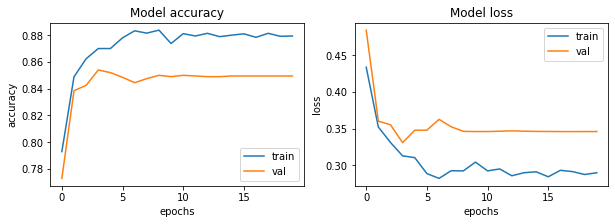

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
model.evaluate(test_generator)
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
preds = model.predict(test_generator,
verbose=1)

63/63 [==============================] - 79s 1s/step


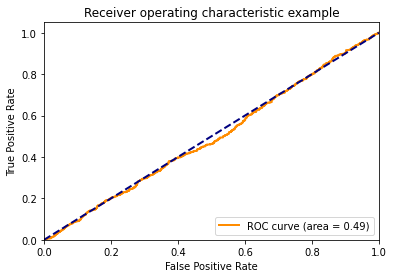

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Testing Predict with new image

In [ ]:
def predictImage(filename):

    img1 = image.load_img(filename,target_size=(150,150))

    Y = image.img_to_array(img1)

    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 0:
        print(fn + " Benign")
    elif val >= 1:
        print(fn + " Malignant")

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  predictImage(path)

Saving melanoma_85.jpg to melanoma_85.jpg
1/1 [==============================] - 0s 75ms/step
[[1.]]
